# Explaining Models with SHAP

## Import model

In [1]:
import joblib
loaded = joblib.load('best-models.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [2]:
# Create new variable with values from loaded dic 
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model = loaded['RandomForest']

In [3]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [5]:
# Create X_shap and y_shap variable
X_shap = shap.sample(X_test_df,nsamples=400,random_state=321)
X_shap

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_missing_value,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
6304,17.700000,0.116724,182.4266,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2164,12.904458,0.045867,37.9506,1985.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7870,11.100000,0.053731,165.1526,1987.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5840,6.635000,0.006352,120.3098,2009.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6000,12.904458,0.021273,229.1326,1985.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4705,12.904458,0.077428,41.8454,1985.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5141,16.700000,0.052493,113.9176,1999.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1020,12.150000,0.063431,65.4826,1998.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7787,16.350000,0.032539,165.7842,1997.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
y_shap = y_test.loc[X_shap.index]
y_shap 

6304    5163.9448
2164     910.8144
7870    1480.0734
5840    1446.1176
6000    7393.0432
          ...    
4705      41.9454
5141    2519.3872
1020     258.3304
7787    2652.5472
17       718.3982
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [7]:
explainer = shap.Explainer(loaded_model)
explainer

In [8]:
# Getting the shap values
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(400, 42)

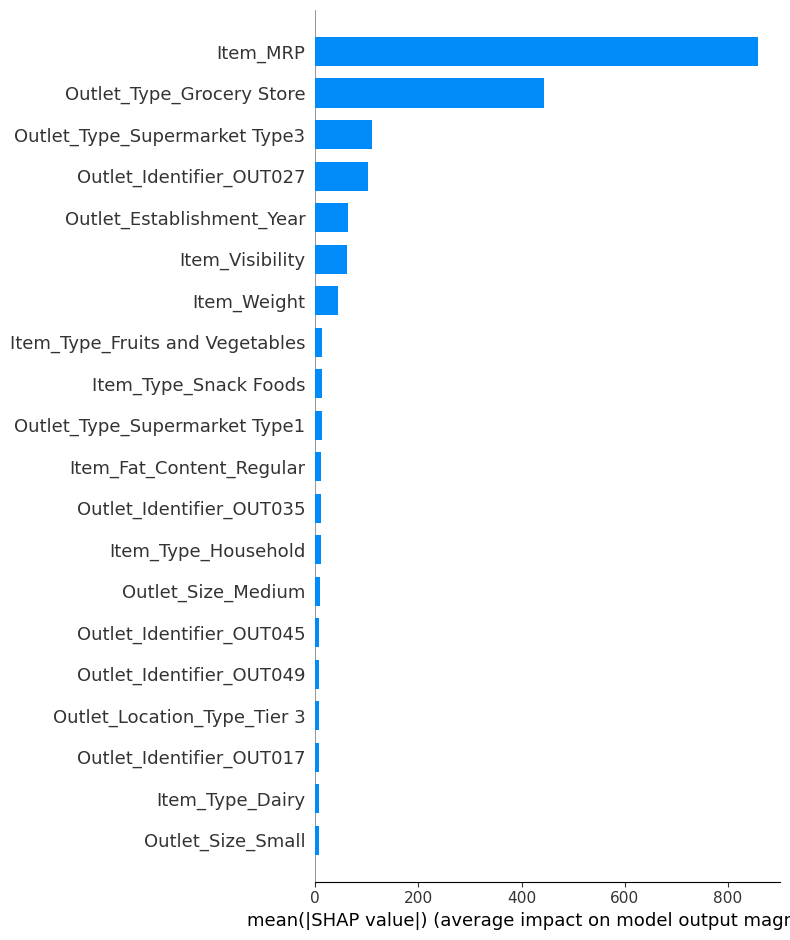

In [11]:
# Plot shap with plot_type = bar
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')

<img src=top10_most_important_features.png>
Comparing Feature importance with Feature importance according to SHAP 

- re-plotting Feature importance from RF regressor model due to markdown cell not displaying my saved plot img when doing `![](url)` or `![](path)` or `<img src = url>` just keep getting broken img icon

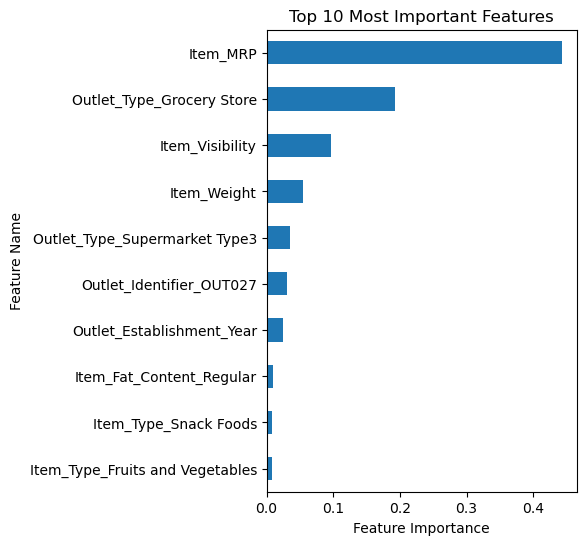

In [12]:
# Re-plot Feature importance for comparison
import pandas as pd
feature_names = preprocessor.get_feature_names_out()
feature_importance = pd.Series(loaded_model.feature_importances_, index=feature_names,
                        name='RandomForestRegressor Feature Importances')
ax = feature_importance.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 10 Most Important Features');

- As we can see above, SHAP's Top-2 importances are similar with built-in random forest importances but the rest are not the same. 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


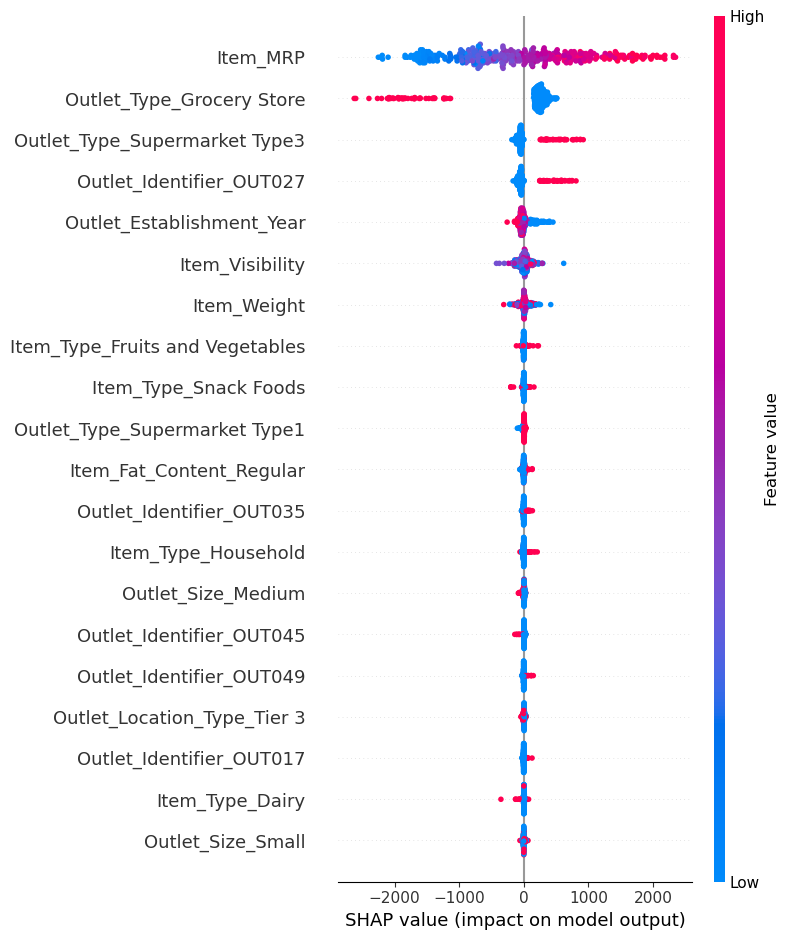

In [13]:
# Plot the default Shap summary
shap.summary_plot(shap_values,X_shap)

- Reading SHAP Top3 Summary Plots
    - "Item_MRP" - Higher(red) item_MRP have positive impact on our model and opposite can be said to lower(blue) feature value item_MRP
    - "Outlet_Type_Grocery Store" - Items that are sold under outlet_type Grocery store have negative impact on our model output which make sense because based on our EDA Grocery store has the smallest distribution relative to other outlet_type
    - "Outlet_Type_Supermarket Type3" - the opposite of Grocery store, Supermarket Type3 holds the top spot of highest avg item_outlet_sales compared to other outlet_type based on our EDA which explain why it has high possitive impact on our model output

![](C:\Users\kdelfino\Documents\GitHub\Sales-prediction\image\top10_most_important_features.png)